In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
y_train_binary = (y_train == 1)
y_test_binary = (y_test == 1)

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 2D input to 1D
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 perceptrons
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 perceptron for binary classification
])

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train_binary, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0254 - accuracy: 0.9918
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0079 - accuracy: 0.9972
Epoch 4/10
1875/1875 [==============================] - 2s 997us/step - loss: 0.0057 - accuracy: 0.9981
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0040 - accuracy: 0.9986
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0033 - accuracy: 0.9988
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0023 - accuracy: 0.9993
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 0.9992
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test_binary)
print('Test accuracy:', test_acc * 100)

313/313 [==============================] - 0s 670us/step - loss: 0.0101 - accuracy: 0.9979
Test accuracy: 99.79000091552734


In [9]:
y_train_digit = (y_train == 5)  # Set True for digit 5, False for other digits
y_test_digit = (y_test == 5)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 perceptrons for digits 0 to 9
])

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
y_train_digit = tf.keras.utils.to_categorical(y_train_digit, num_classes=10)
y_test_digit = tf.keras.utils.to_categorical(y_test_digit, num_classes=10)

In [13]:
model.fit(x_train, y_train_digit, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0554 - accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0206 - accuracy: 0.9934
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0106 - accuracy: 0.9962
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0077 - accuracy: 0.9974
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0042 - accuracy: 0.9984
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0028 - accuracy: 0.9990
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.002

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test_digit)
print('Test accuracy:', test_acc * 100)

313/313 [==============================] - 0s 674us/step - loss: 0.0164 - accuracy: 0.9955
Test accuracy: 99.55000281333923


In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [17]:
Y_train = np_utils.to_categorical(y_train, num_classes=10)
Y_test = np_utils.to_categorical(y_test, num_classes=10)

In [18]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2507 - accuracy: 0.9249 - val_loss: 0.1130 - val_accuracy: 0.9650
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1004 - accuracy: 0.9699 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 0.0783 - val_accuracy: 0.9758
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0548 - accuracy: 0.9823 - val_loss: 0.0658 - val_accuracy: 0.9794
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0457 - accuracy: 0.9851 - val_loss: 0.0677 - val_accuracy: 0.9810


In [21]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 98.10%


In [22]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(classes_x == y_test)[0]
incorrect_indices = np.nonzero(classes_x != y_test)[0]

313/313 [==============================] - 0s 991us/step


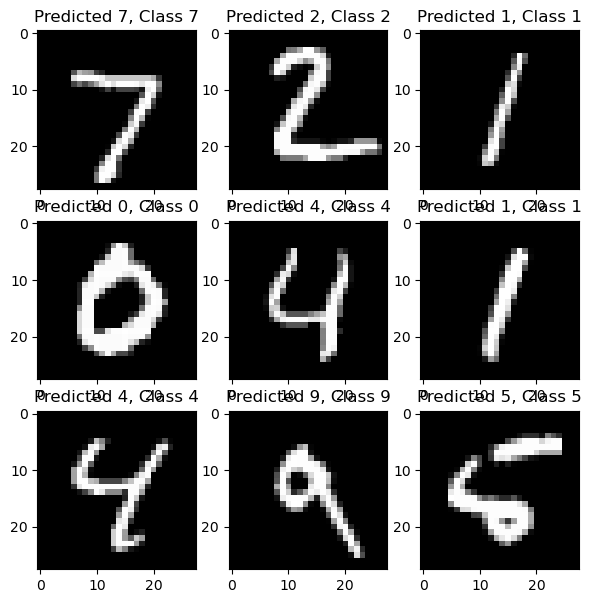

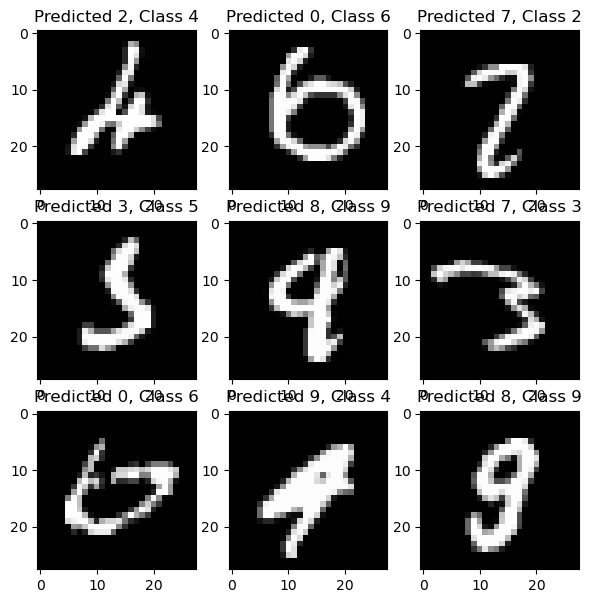

In [23]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[incorrect], y_test[incorrect]))